## Problem Statement

we need to predict the Student score using the depency features like gender,ethnicity, Lunch, Parental Education etc.

# EDA Part of the dataset

## Need to do in EDA
1. check the Duplicates values present or not and drop  the duplicate values.
2. Check the null values are present or not and remove all the null values.
3. check the datatype of each column.
4. check Statistics of dataset.
5. check the outliers and drop them
6. check the values count or unique values of each categorical feature.
7. make some visulization using countplot, catplot, or boxplot


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_csv("data/StudentsPerformance.csv")

In [23]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
data.shape

(1000, 8)

### check the duplicates and drop them

In [25]:
data=data.drop_duplicates()
data.shape

(1000, 8)

There is no any duplicates values present in the dataset

### check the null values and if there are present then remove them

In [26]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

there are no null values present in the dataset

### checking the datatype of each column

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


### check the statistics of dataset

In [28]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### check the outliers and drop them if they are present in dataset

<Axes: >

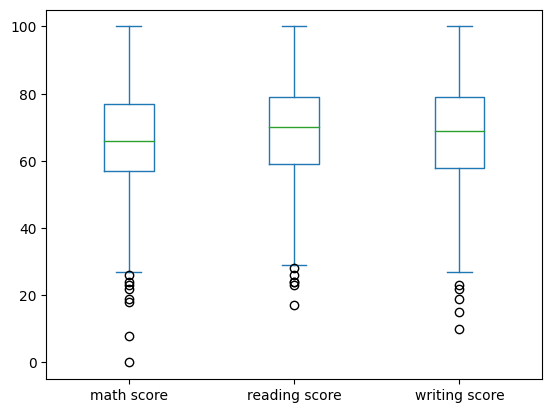

In [29]:
data.plot(kind="box")

from the visulization we find out that there are some outliers present in the data. but if we deep dive in domain knowledge of the dataset we will find there can be some students which are getting maximum number of marks out of maximum. that's why that datapoints are not outlier. we should not drop them .

In [30]:
# def outlier_removal(data,column_name):
#     mean=np.mean(data[column_name])
#     std=np.std(data[column_name])
#     cutoff=3*std
#     lower_range,uper_range=mean-cutoff,mean+cutoff
#     lower_indexes=data[data[column_name]<lower_range].index
#     uper_indexes=data[data[column_name]>uper_range].index
#     data=data.drop(lower_indexes,axis=0)
#     data=data.drop(uper_indexes,axis=0)
#     return data

In [31]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### checking the uniques values for each categorical feature

In [32]:
categorical_features=data.select_dtypes("object").columns
len(categorical_features)

5

In [33]:
numeric_features=data.select_dtypes("int").columns
len(numeric_features)

3

In [34]:
for i in categorical_features:
    print(f"::: {i}:::")
    print(data[i].value_counts())
    print(">>>>>>>>>>>>>>")
    print(">>>>>>>>>>>>>>")

::: gender:::
female    518
male      482
Name: gender, dtype: int64
>>>>>>>>>>>>>>
>>>>>>>>>>>>>>
::: race/ethnicity:::
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
>>>>>>>>>>>>>>
>>>>>>>>>>>>>>
::: parental level of education:::
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
>>>>>>>>>>>>>>
>>>>>>>>>>>>>>
::: lunch:::
standard        645
free/reduced    355
Name: lunch, dtype: int64
>>>>>>>>>>>>>>
>>>>>>>>>>>>>>
::: test preparation course:::
none         642
completed    358
Name: test preparation course, dtype: int64
>>>>>>>>>>>>>>
>>>>>>>>>>>>>>


### for make the target we need to perfome some opration on the marks features

In [35]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
data["score"]=round((data["math score"]+data["reading score"]+data["writing score"])/3)

In [37]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [38]:
data=data.drop(numeric_features,axis=1)

In [39]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score
0,female,group B,bachelor's degree,standard,none,73.0
1,female,group C,some college,standard,completed,82.0
2,female,group B,master's degree,standard,none,93.0
3,male,group A,associate's degree,free/reduced,none,49.0
4,male,group C,some college,standard,none,76.0


### Some visulization of categorical features with respect to target feature score

In [40]:
sns.countplot(data["gender"])

ValueError: could not convert string to float: 'female'

There is no too much difference blw female and male in class total students ratio

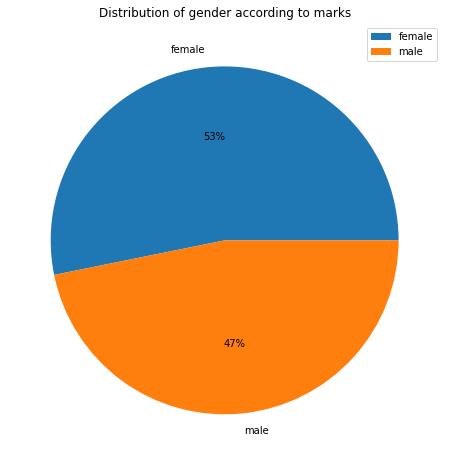

In [ ]:
#let's make the distribution pie with score and gender
plt.figure(figsize=(14,8))
lables=data.groupby("gender")["score"].sum().index
values=data.groupby("gender")["score"].sum().values
plt.title("Distribution of gender according to marks")
plt.pie(values,labels=lables,autopct="%2.f%%")
plt.legend()
plt.show()

Here we can clearly see that Female got the overall more marks then male but no too much difference

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x576 with 0 Axes>

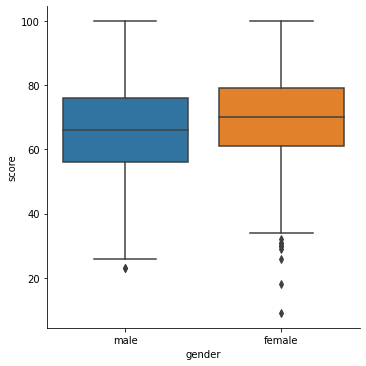

In [ ]:
##let's see the maximum and minimum marks from both side
plt.figure(figsize=(14,8))
sns.catplot("gender","score",data=data.sort_values("score",ascending=False),kind="box")
plt.show()

as here we can cleary see that both male and female has the maximum marks but female has the minimum marks 

#### Let's explore the ethinicity/race feature

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


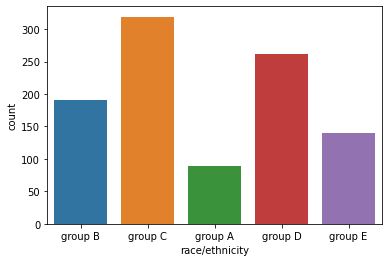

In [ ]:
sns.countplot(data["race/ethnicity"])
plt.show()

#### Here we can see that:
1. most of the student are belong to **group C**
2. least student belong to **group A**

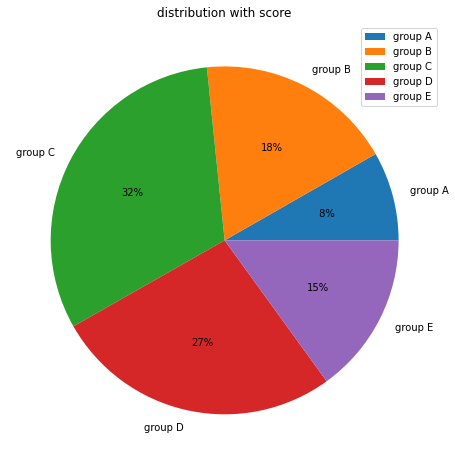

In [ ]:
##### let's see the distribution with score
plt.figure(figsize=(15,8))
plt.title("distribution with score")
indexes=data.groupby("race/ethnicity")["score"].sum().index
values=data.groupby("race/ethnicity")["score"].sum().values
plt.pie(values,labels=indexes,autopct="%2.f%%")
plt.legend()
plt.show()

Here we can see that **group c** Students get the maximum marks about **32%** and **group a** get the least marks about **8%**

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1152x576 with 0 Axes>

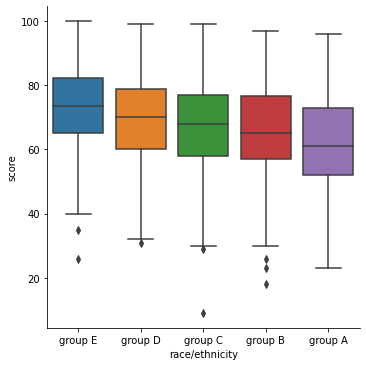

In [ ]:
## let's see which group get the hightest marks and how many
plt.figure(figsize=(16,8))
sns.catplot("race/ethnicity","score",data=data.sort_values("score",ascending=False),kind="box")
plt.show()
           

from here we can see that **group E** has the higest marks and **group C** has the  minimum marks individually

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='parental level of education', ylabel='count'>

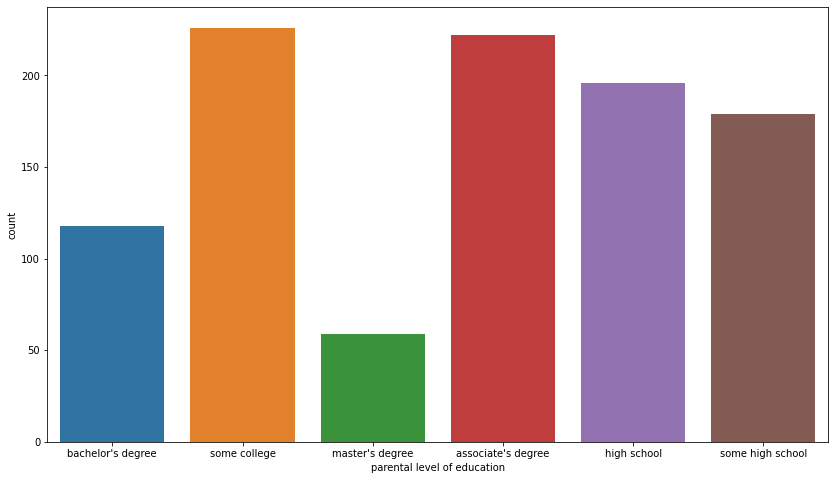

In [ ]:
## lets see the countplot of parental level of education
plt.figure(figsize=(14,8))
sns.countplot(data["parental level of education"])

Here we can see that most have the **some college or associate's degree or high school** but very least have the master's degree

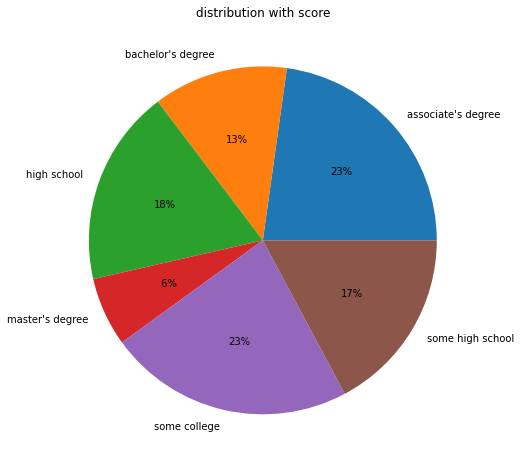

In [ ]:
##### let's see the distribution with score
plt.figure(figsize=(15,8))
plt.title("distribution with score")
indexes=data.groupby("parental level of education")["score"].sum().index
values=data.groupby("parental level of education")["score"].sum().values
plt.pie(values,labels=indexes,autopct="%2.f%%")
# plt.legend()
plt.show()

**some college and associate's degree** has the most contribution of score with *23%* where as **master's degree** has the least contribution in score with *6%*..

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


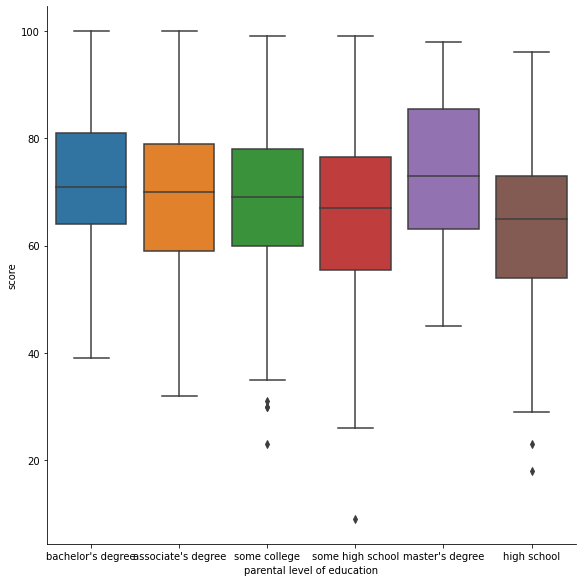

In [ ]:
## let's see which group get the hightest marks and how many
sns.catplot("parental level of education","score",data=data.sort_values("score",ascending=False),kind="box",height=8)
plt.show()

**some high school** has the Lowest marks and  **high school and some college also** have low score

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='lunch', ylabel='count'>

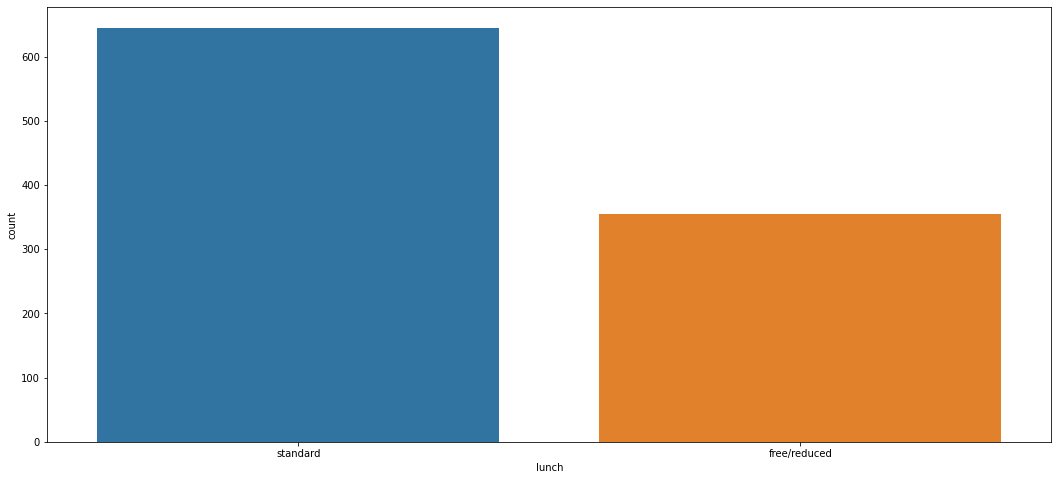

In [ ]:
## lets see the countplot of lunch
plt.figure(figsize=(18,8))
sns.countplot(data["lunch"])

Standard has the more students count where as free/reduced has the lesser student count

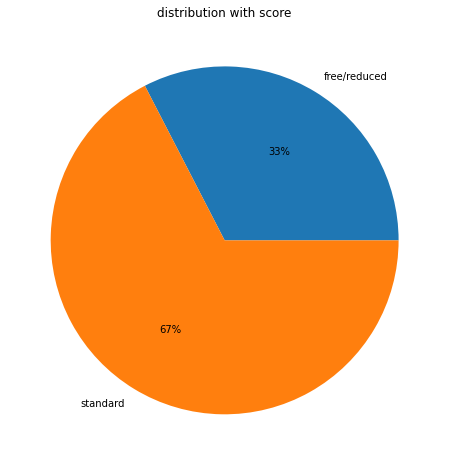

In [ ]:
##### let's see the distribution with score
plt.figure(figsize=(15,8))
plt.title("distribution with score")
indexes=data.groupby("lunch")["score"].sum().index
values=data.groupby("lunch")["score"].sum().values
plt.pie(values,labels=indexes,autopct="%2.f%%")
# plt.legend()
plt.show()

Standard has more score contribution with **67%** and free/reduced has the less contribution with **33%**. 

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


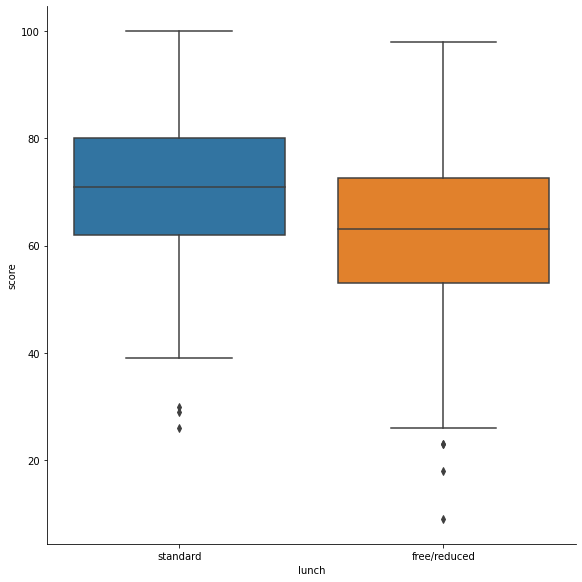

In [ ]:
## let's see which group get the hightest marks and how many
sns.catplot("lunch","score",data=data.sort_values("score",ascending=False),kind="box",height=8)
plt.show()

free/reduced has the **minimum score** than standard. Standard contains the **maximum** score

In [ ]:
data.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score
0,female,group B,bachelor's degree,standard,none,73.0


c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


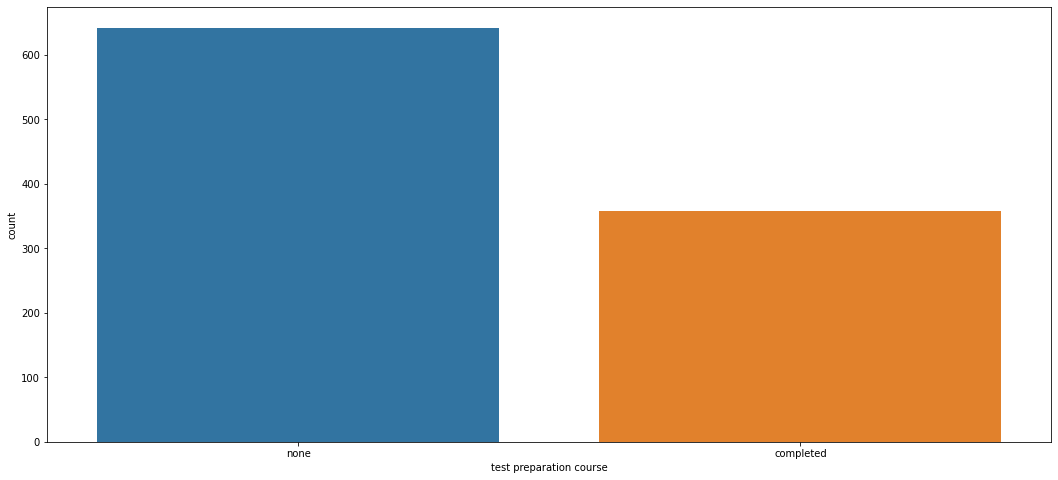

In [ ]:
## lets see the countplot of test preparation course
plt.figure(figsize=(18,8))
sns.countplot(data["test preparation course"])
plt.show()

There are many students which do have completed the test preparation course courese comparsion with who are completed

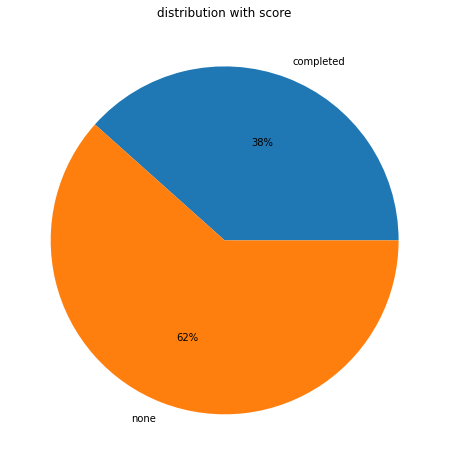

In [ ]:
##### let's see the distribution with score
plt.figure(figsize=(15,8))
plt.title("distribution with score")
indexes=data.groupby("test preparation course")["score"].sum().index
values=data.groupby("test preparation course")["score"].sum().values
plt.pie(values,labels=indexes,autopct="%2.f%%")
# plt.legend()
plt.show()

The Students who do not completed the course or **None** has the more score contribution than who completed..

c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


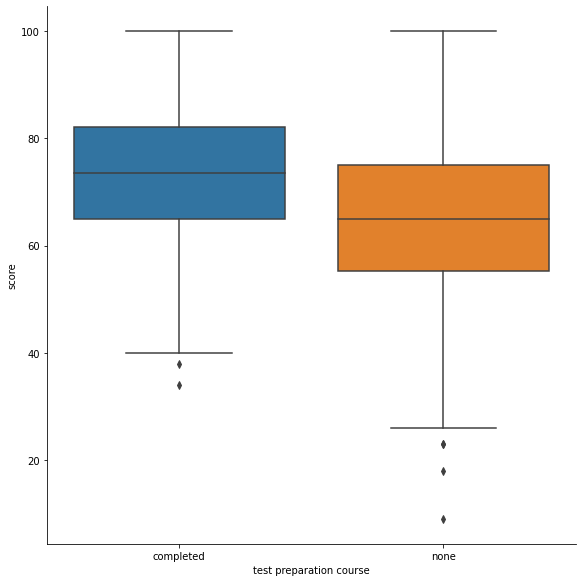

In [ ]:
## let's see which group get the hightest marks and how many
sns.catplot("test preparation course","score",data=data.sort_values("score",ascending=False),kind="box",height=8)
plt.show()

The Students who do **not complted the course** has the **Lowest or minimum** Marks. 

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score
0,female,group B,bachelor's degree,standard,none,73.0
1,female,group C,some college,standard,completed,82.0
2,female,group B,master's degree,standard,none,93.0
3,male,group A,associate's degree,free/reduced,none,49.0
4,male,group C,some college,standard,none,76.0


In [ ]:
data=data.rename(columns={"gender":"Gender",
                         "race/ethnicity":"Race_Ethinicity",
                         "parental level of education":"Parental_Level_Of_Education",
                         "test preparation course":"Test_Preparation_Course",
                        "lunch":"Lunch",
                        "score":"Score"})

In [ ]:
data.head()

,Gender,Race_Ethinicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Score
0,female,group B,bachelor's degree,standard,none,73.0
1,female,group C,some college,standard,completed,82.0
2,female,group B,master's degree,standard,none,93.0
3,male,group A,associate's degree,free/reduced,none,49.0
4,male,group C,some college,standard,none,76.0


C:\Users\asdf\AppData\Local\Temp/ipykernel_15484/1840963933.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asdf\AppData\Local\Temp/ipykernel_15484/1840963933.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\asdf\AppData\Local\Temp/ipykernel_15484/1840963933.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two 

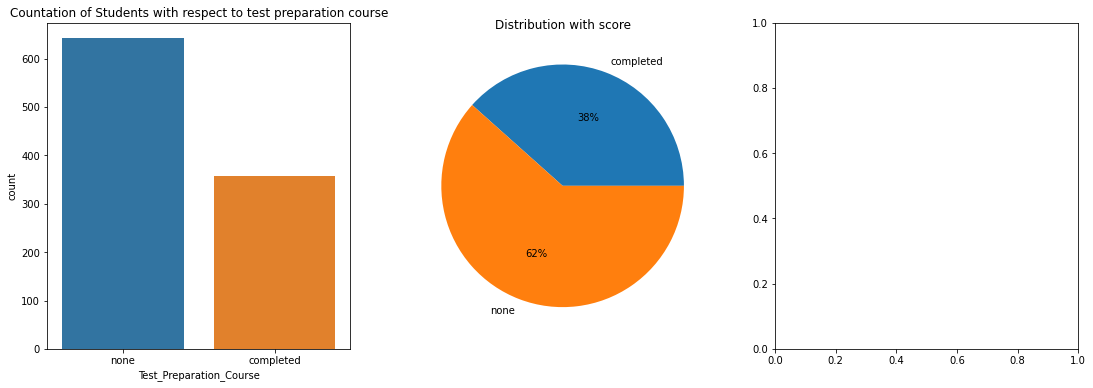

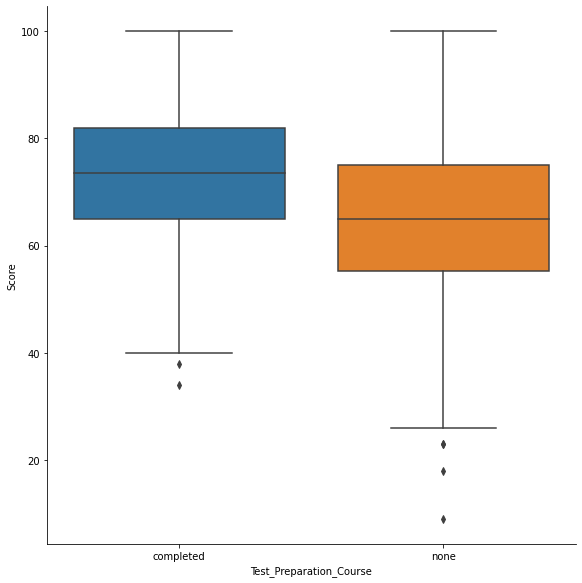

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title("Countation of Students with respect to test preparation course")
sns.countplot(data["Test_Preparation_Course"])
plt.subplot(142)
plt.title("Distribution with score")
indexes=data.groupby("Test_Preparation_Course")["Score"].sum().index
values=data.groupby("Test_Preparation_Course")["Score"].sum().values
plt.pie(values,labels=indexes,autopct="%2.f%%")
plt.subplot(143)
sns.catplot("Test_Preparation_Course","Score",data=data.sort_values("Score",ascending=False),kind="box",height=8)
plt.show()